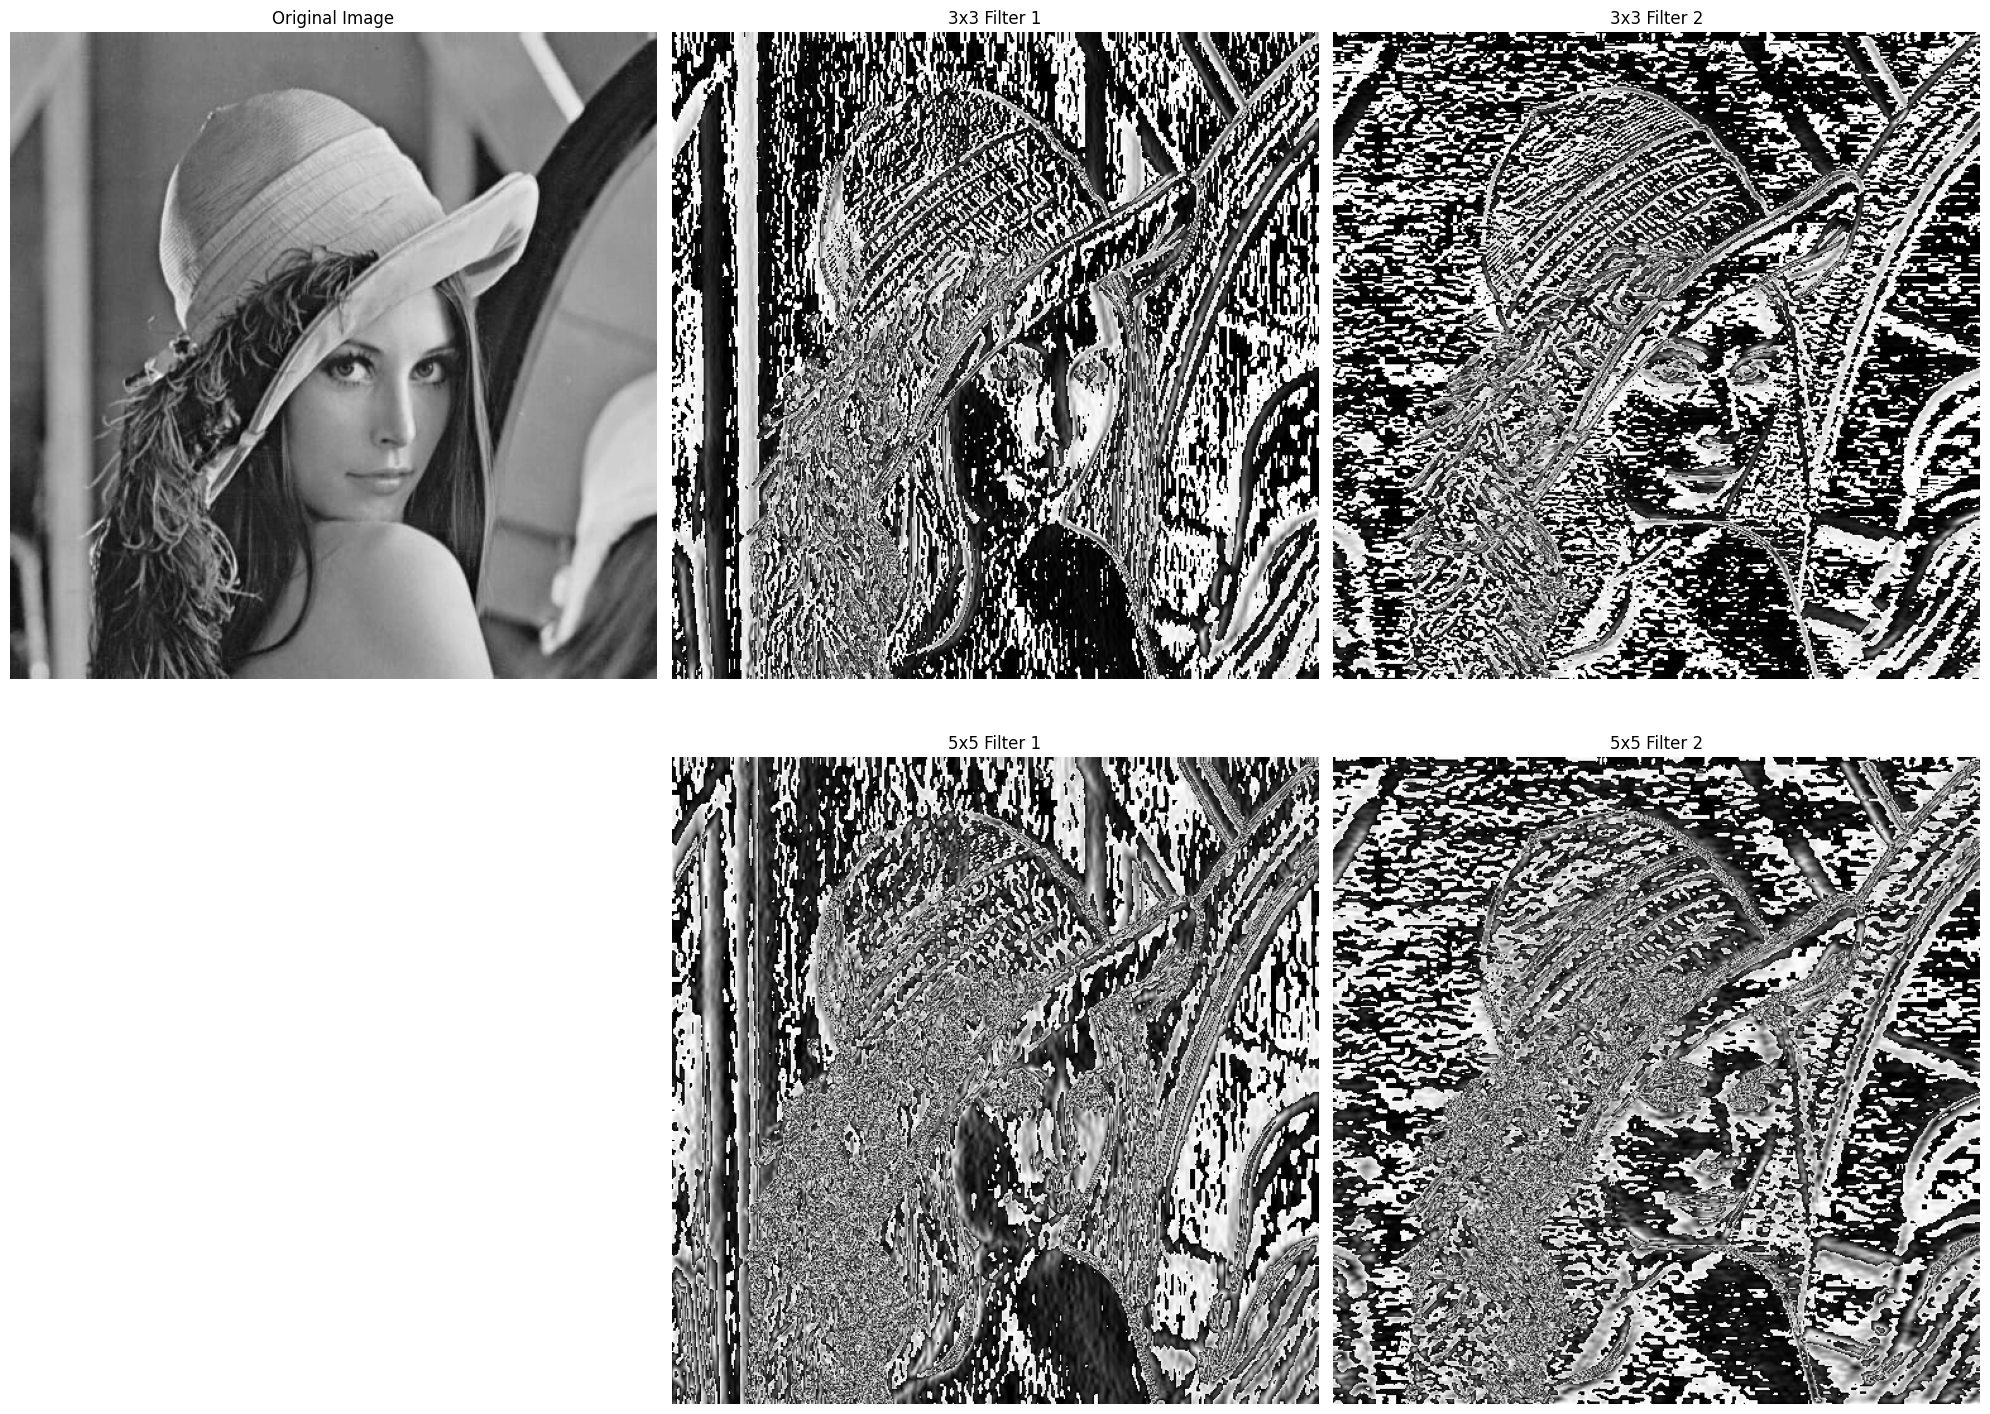

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Function to load and convert image to grayscale
def load_image_from_url(url):
    response = requests.get(url)
    image = plt.imread(BytesIO(response.content), format='jpg')

    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        grayscale = np.dot(image[..., :3], [0.299, 0.587, 0.114])
        return grayscale.astype(np.uint8)
    else:
        return image.astype(np.uint8)

# Function to apply filter
def apply_filter(image, filter):
    height, width = image.shape
    f_height, f_width = filter.shape
    pad_height, pad_width = f_height // 2, f_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    filtered_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            filtered_image[i, j] = np.sum(padded_image[i:i+f_height, j:j+f_width] * filter)

    return filtered_image

# Main processing function
def process_image(image):
    # Define filters
    filter_3x3_1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    filter_3x3_2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    filter_5x5_1 = np.array([
        [-1, -1, 0, 1, 1],
        [-1, -1, 0, 1, 1],
        [-1, -1, 0, 1, 1],
        [-1, -1, 0, 1, 1],
        [-1, -1, 0, 1, 1]
    ])
    filter_5x5_2 = np.array([
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [-1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1]
    ])

    # Apply filters
    filtered_3x3_1 = apply_filter(image, filter_3x3_1)
    filtered_3x3_2 = apply_filter(image, filter_3x3_2)
    filtered_5x5_1 = apply_filter(image, filter_5x5_1)
    filtered_5x5_2 = apply_filter(image, filter_5x5_2)

    # Display results
    plt.figure(figsize=(20, 15))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(filtered_3x3_1, cmap='gray')
    plt.title('3x3 Filter 1')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(filtered_3x3_2, cmap='gray')
    plt.title('3x3 Filter 2')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(filtered_5x5_1, cmap='gray')
    plt.title('5x5 Filter 1')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(filtered_5x5_2, cmap='gray')
    plt.title('5x5 Filter 2')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
image_url = "https://raw.githubusercontent.com/saptarshihalder/Assignment/main/Image.jpg"
image = load_image_from_url(image_url)
process_image(image)
